In [31]:
#!pip install shapely
#!pip install geopandas
#!pip install fiona

In [39]:
import rasterio as rio
from rasterio.merge import merge
from rasterio.features import shapes
from rasterio.mask import mask
from rasterio.plot import show
from shapely.geometry import shape
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import os

In [14]:
base_image = 'C:/Users/jullian.williams/Desktop/HIRLOMAP/hornsund_zmail/landmask2011.tif'
overlay_image = 'C:/Users/jullian.williams/Desktop/HIRLOMAP/bin_test/20120130.tif'
# open file with rasterio
base = rio.open(base_image)
overlay = rio.open(overlay_image)
bimg = base.read()
oimg = overlay.read()

In [ ]:
# Open the raster file
with rio.open("C:/Users/jullian.williams/Desktop/HIRLOMAP/hornsund_zmail/landmask2011.tif") as src:
    raster_data = src.read(1)  # Read the first band
    transform = src.transform

# Extract shapes (polygons) and values from the raster
shapes_generator = shapes(raster_data, transform=transform)

# Convert shapes to GeoDataFrame
geometries = []
values = []

for geom, value in shapes_generator:
    geometries.append(shape(geom))
    values.append(value)

gdf = gpd.GeoDataFrame({"geometry": geometries, "value": values})

# Save to a vector file (e.g., GeoJSON or Shapefile)
gdf.to_file("C:/Users/jullian.williams/Desktop/HIRLOMAP/bin_test/bin_vector/2011_.shp", driver="ESRI Shapefile") # If geojson: gdf.to_file("output_vector.geojson", driver="GeoJSON")

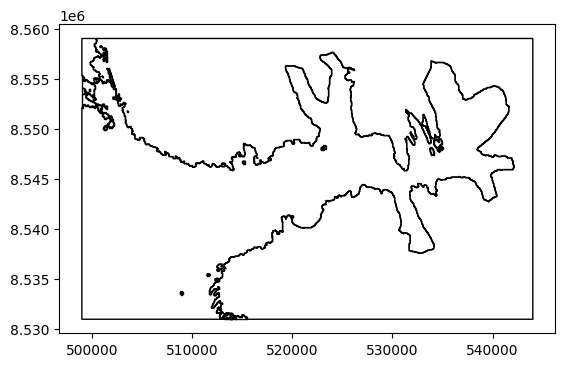

In [15]:
tsl_fp = 'C:/Users/jullian.williams/Desktop/HIRLOMAP/bin_test/bin_vector/2011_.shp'
tsl_shp = gpd.read_file(tsl_fp)

# Plot the shape
tsl_shp.plot(edgecolor ='black', facecolor = 'None');

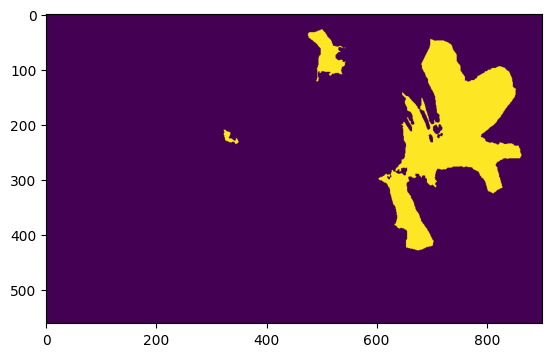

<Axes: >

In [26]:
show(oimg)

In [3]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [4]:
tsl_coord = getFeatures(tsl_shp)

print(tsl_coord)

[{'type': 'Polygon', 'coordinates': [[[500825.0, 8558275.0], [500925.0, 8558275.0], [500925.0, 8558225.0], [500975.0, 8558225.0], [500975.0, 8558175.0], [500875.0, 8558175.0], [500875.0, 8558125.0], [500825.0, 8558125.0], [500825.0, 8558175.0], [500775.0, 8558175.0], [500775.0, 8558225.0], [500825.0, 8558225.0], [500825.0, 8558275.0]]]}]


In [28]:
clip, transform = mask(overlay, tsl_coord, crop=True)

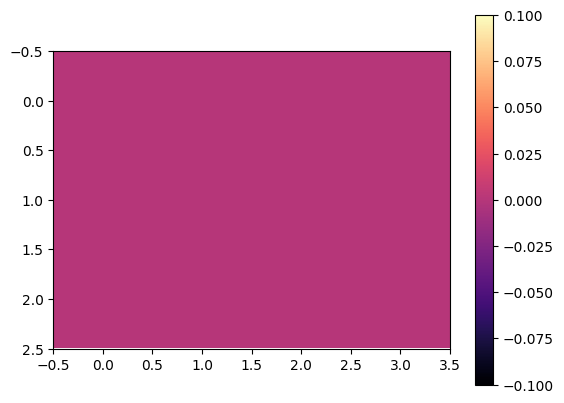

In [25]:
plt.imshow(clip[0], cmap='magma')
plt.colorbar();

In [47]:
import fiona
# Read Shape file
with fiona.open('C:/Users/jullian.williams/Desktop/HIRLOMAP/bin_test/bin_vector/2011_.shp', "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [48]:
print(shapes)

[fiona.Geometry(coordinates=[[(500825.0, 8558275.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(501175.0, 8558075.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(501425.0, 8557525.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(501475.0, 8557325.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(501225.0, 8557175.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(501275.0, 8557125.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(525925.0, 8555975.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(526075.0, 8555975.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(500975.0, 8555275.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(501025.0, 8555225.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(501075.0, 8555175.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(500375.0, 8554875.0), ...]], type='Polygon'), fiona.Geometry(coordinates=[[(501825.0, 8554775.0), ...]], type='Polygon'), fiona.Geome

In [49]:
clip, transform = mask(overlay, shapes, crop=False)

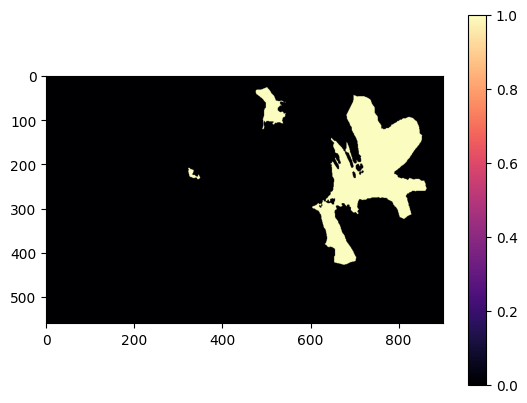

In [50]:
plt.imshow(clip[0], cmap='magma')
plt.colorbar();

In [54]:
with rio.open("C:/Users/jullian.williams/Desktop/HIRLOMAP/bin_test/clipped.tif", "w", driver='GTiff', height=clip.shape[1],     
    width=clip.shape[2], count=1, dtype=clip.dtype) as dest:
    dest.write(clip)

References: 

https://geospatialyst.readthedocs.io/en/latest/Content/Lesson/geo-python-course/06.Raster-data-analysis.html